In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#to get training and test data
from sklearn.model_selection import train_test_split
# to work on images 
from PIL import Image

Get and split data

In [2]:
# Path to the image folder -----------------------------------change this accordingly 
image_folder = "output"

In [3]:
#loading the data into numpy array 
image_list = []
label_list = []

#class_names = os.listdir(image_folder) #names of the subfolder
class_names=["Open","Closed"]#we know our data

for class_name in class_names:
    class_path=os.path.join(image_folder, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path).convert('L')# L is for 8 bit grey scale image 
            #img = img.resize((200,200))  # Resize to desired shape
            img_array = np.array(img)
            image_list.append(img_array)
            if class_name == 'Open':
                label_list.append(1)#1 if open else closed 
            else:
                label_list.append(0)
        except Exception as e:
            print(f"Failed to load {img_path}: {e}")

# Convert to NumPy arrays
images = np.array(image_list)
labels = np.array(label_list)

print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (1452, 200, 200)
Shape of labels: (1452,)


In [4]:
# creating a 70|15|15 training test and validation split 

# 15% split of test data
image_temp, image_test, label_temp, label_test = train_test_split(
    images, labels, test_size=0.15, random_state=42, stratify=labels
)

# 70 and 15 percent split of training and validation 0.1765=15/85  
image_train, image_val, label_train, label_val = train_test_split(
    image_temp, label_temp, test_size=0.2, random_state=42, stratify=label_temp
)

print("no of images for testing",len(image_train))
print("no of images for testing",len(image_test))
print("no of images for validation",len(image_val))
type(image_test)
image_test.shape

no of images for testing 987
no of images for testing 218
no of images for validation 247


(218, 200, 200)

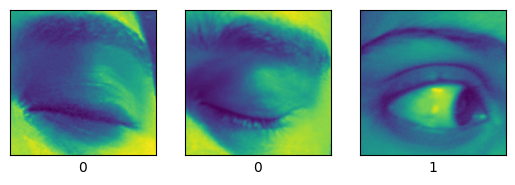

In [5]:
#plotting
#change here to plot image_val and image_test
plot_image=image_train
plot_label=label_train
import random
plt.figure()
image_pos=1
for i in range(3):
    index=random.randint(0,len(image_test))

    plt.subplot(1,3,image_pos)
    plt.imshow(plot_image[index])
    plt.xlabel(str(plot_label[index]))
    plt.xticks([])
    plt.yticks([])

    image_pos+=1
plt.show()

BUILD CNN

In [6]:
#scailing the image data to make it easier for our model to learn
image_train, image_test, image_val = image_train/255, image_test/255, image_val/255
import tensorflow as tf
from tensorflow.keras import layers,models

#input to the model is of size 200x200
# two pooling layers for now 

model = models.Sequential()

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same',))

c:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,352 (110.75 KB)

 Trainable params: 28,352 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(layers.Flatten())

# Dropout after flattening
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout between dense layers

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))  # Optional: can be adjusted/removed

# Final layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,272,641 (39.19 MB)

 Trainable params: 10,272,641 (39.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#implementing early stopping
import tensorflow 
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [11]:
model_history = model.fit(
    image_train, label_train,
    validation_data=(image_val, label_val),  # use this instead of validation_split
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 674ms/step - accuracy: 0.4625 - loss: 0.7619 - val_accuracy: 0.5628 - val_loss: 0.6656
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 631ms/step - accuracy: 0.6776 - loss: 0.5811 - val_accuracy: 0.8907 - val_loss: 0.3557
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 643ms/step - accuracy: 0.8686 - loss: 0.3171 - val_accuracy: 0.8583 - val_loss: 0.3080
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 649ms/step - accuracy: 0.9033 - loss: 0.2610 - val_accuracy: 0.9069 - val_loss: 0.2722
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 649ms/step - accuracy: 0.9310 - loss: 0.1833 - val_accuracy: 0.8947 - val_loss: 0.2626
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 644ms/step - accuracy: 0.9162 - loss: 0.2067 - val_accuracy: 0.9109 - val_loss: 0.2149
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 653ms/step - accuracy: 0.9232 - loss: 0.2096 - val_accuracy: 0.9352 - val_loss: 0.1354
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 634ms/step - accuracy: 0.9434 - loss: 0.1459 - 

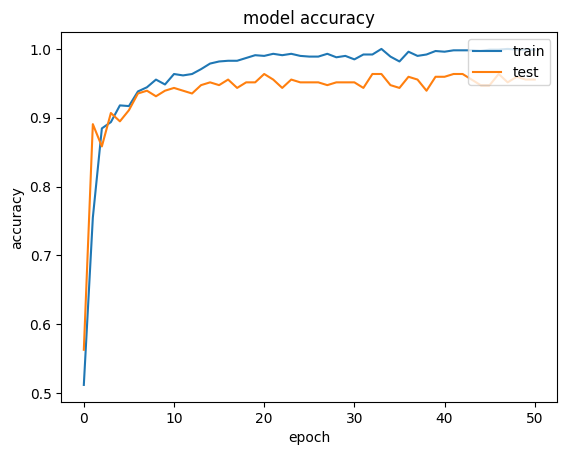

In [12]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc="upper right")
plt.show()

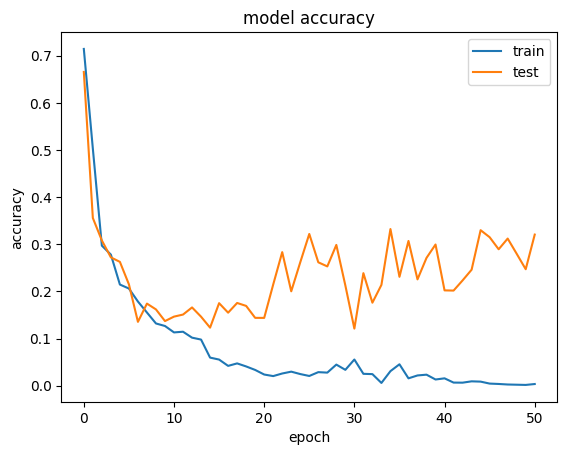

In [13]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc="upper right")
plt.show()

In [14]:
#testing with know values
image_predicted = model.predict(image_test)

# Convert predicted probabilities to class indices
predicted_classes = (image_predicted > 0.5).astype(int)

# Use the actual labels, not image data
true_classes = label_test 
# Now calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", score*100,"%")

""" from sklearn.metrics import accuracy_score

# Predict on test data
image_predicted = model.predict(image_test)
predicted_classes = (image_predicted > 0.5).astype(int).flatten()
true_classes = label_test.flatten()

# Loop and pause on each misclassification
for idx in range(len(predicted_classes)):
    if predicted_classes[idx] != true_classes[idx]:
        print(f"Misclassified at index {idx}")
        print(f"Predicted: {predicted_classes[idx]}, Actual: {true_classes[idx]}")

        # Show image
        plt.imshow(image_test[idx].reshape(200, 200), cmap='gray')
        plt.title(f"Predicted: {predicted_classes[idx]} | Actual: {true_classes[idx]}")
        plt.axis('off')
        plt.show()

        input("Press Enter to continue to the next image...")  # Wait for key press

# Accuracy
score = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", score * 100, "%") """


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
Accuracy: 96.78899082568807 %


' from sklearn.metrics import accuracy_score\n\n# Predict on test data\nimage_predicted = model.predict(image_test)\npredicted_classes = (image_predicted > 0.5).astype(int).flatten()\ntrue_classes = label_test.flatten()\n\n# Loop and pause on each misclassification\nfor idx in range(len(predicted_classes)):\n    if predicted_classes[idx] != true_classes[idx]:\n        print(f"Misclassified at index {idx}")\n        print(f"Predicted: {predicted_classes[idx]}, Actual: {true_classes[idx]}")\n\n        # Show image\n        plt.imshow(image_test[idx].reshape(200, 200), cmap=\'gray\')\n        plt.title(f"Predicted: {predicted_classes[idx]} | Actual: {true_classes[idx]}")\n        plt.axis(\'off\')\n        plt.show()\n\n        input("Press Enter to continue to the next image...")  # Wait for key press\n\n# Accuracy\nscore = accuracy_score(true_classes, predicted_classes)\nprint("Accuracy:", score * 100, "%") '

In [15]:
model.save(f"driver_drowsiness.keras")

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

def predict_output(image_input):
    # Load the model
    model = load_model("driver_drowsiness.keras")

    # Convert to grayscale if not already
    image = Image.fromarray(image_input).convert("L")

    # Resize to 200x200
    image = image.resize((200, 200))

    # Convert to array and normalize
    image_array = img_to_array(image) / 255.0  # shape: (200, 200, 1)

    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)  # shape: (1, 200, 200, 1)

    # Predict
    prediction = model.predict(image_array)
    predicted_label = "Open" if prediction[0][0] > 0.5 else "Closed"

    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


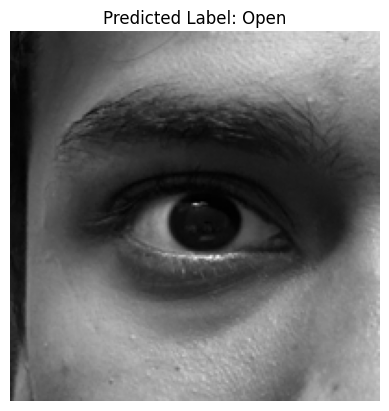

In [19]:
from PIL import Image

#as image generated from ms paint has a white background

img = Image.open("left_eye.jpeg").convert("L")  # grayscale
image_input=np.array(img)
predict_output(image_input)